# Лабораторная работа №2
## по предмету "Системы искусственного интеллекта"
### БВТ2101 Юдин Артём

В данной лабораторной работе вы будете работать с набором данных, который содержит информацию о технических характеристиках ноутбуков и их цену.
Целью работы является изучение теоретических основ методов машинного обучения.

В наборе данных для лабораторной работы содержится абор характеристик  мобильных телефонов, включая мощность аккумулятора, характеристики камеры, поддержку сети, память, размеры экрана и другие атрибуты. Столбец «price_range» классифицирует телефоны по ценовым диапазонам (этот столбец необходимо предсказать).

### Задание 1

Выгрузите данные из датасета. Изучите колонки, проверьте наличие пропусков. Постройте матрицу корреляции между признаками и целевой переменной. Сделайте выводы, что показывает эта матрица.

In [2]:
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import typing as tp
from math import sqrt


df = pl.read_csv("../csv/AIS2.csv")
df.head()

battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
i64,i64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.describe()

statistic,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1238.5185,0.495,1.52225,0.5095,4.3095,0.5215,32.0465,0.50175,140.249,4.5205,9.9165,645.108,1251.5155,2124.213,12.3065,5.767,11.011,0.7615,0.503,0.507,1.5
"""std""",439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
"""min""",501.0,0.0,0.5,0.0,0.0,0.0,2.0,0.1,80.0,1.0,0.0,0.0,500.0,256.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
"""25%""",852.0,0.0,0.7,0.0,1.0,0.0,16.0,0.2,109.0,3.0,5.0,283.0,875.0,1208.0,9.0,2.0,6.0,1.0,0.0,0.0,1.0
"""50%""",1227.0,0.0,1.5,1.0,3.0,1.0,32.0,0.5,141.0,4.0,10.0,564.0,1247.0,2147.0,12.0,5.0,11.0,1.0,1.0,1.0,2.0
"""75%""",1615.0,1.0,2.2,1.0,7.0,1.0,48.0,0.8,170.0,7.0,15.0,947.0,1633.0,3064.0,16.0,9.0,16.0,1.0,1.0,1.0,2.0
"""max""",1998.0,1.0,3.0,1.0,19.0,1.0,64.0,1.0,200.0,8.0,20.0,1960.0,1998.0,3998.0,19.0,18.0,20.0,1.0,1.0,1.0,3.0


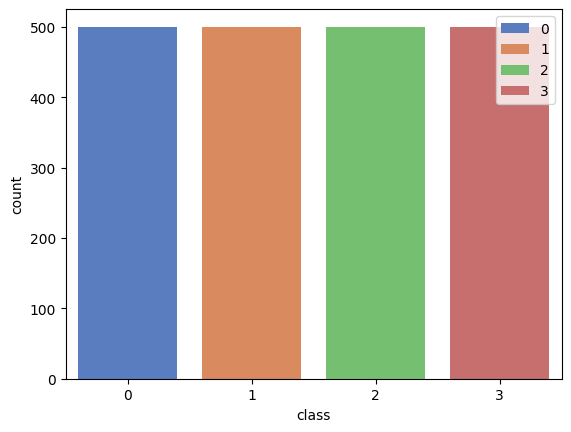

In [4]:
sns.barplot(x=np.array([0, 1, 2, 3]), 
            y=df['price_range'].value_counts()["count"], 
            hue=np.array([0, 1, 2, 3]),
            palette="muted")
plt.xlabel("class")
plt.show()

In [5]:
X = df.drop("price_range").to_numpy()
y = df['price_range'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

scaler_mm = MinMaxScaler()
scaler_std = StandardScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [6]:
class BaseML:
    """Base class for score computing
    
    Args:
        - X_test (np.ndarray) - matrix of features
        - y_test (np.ndarray) - Ground-Truth labels
        - num_neighbours (int) - num neighbours for KNN. Default: None"""
    def score(self, 
              X_test: np.ndarray, 
              y_test: np.ndarray, 
              num_neighbours: tp.Optional[int] = None) -> np.float64:
        """Computes accuracy score"""
        if num_neighbours is None:
            return sum(self.predict(X_test) == y_test) / y_test.shape[0]
        return sum(self.predict(X_test, num_neighbours) == y_test) / y_test.shape[0]

### Задание 2

Реализуйте с нуля алгоритм логистической регрессии для многоклассовой классификации.

$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} $$

$$ \frac{\partial L}{\partial w} = X^T (p - y) + 2\beta w $$

In [7]:
class LogisticRegression(BaseML):
    """Logistic Regression class with L2 penalty

    Args:
        - l2_coeff (float) - l2 penalty coeff. When equals 0 - no penalty
    
    Example:
    >>> np.random.seed(42)
    >>> log_reg = LogisticRegression(0.01)
    >>> log_reg.fit(X_train, y_train, batch_size=10, epochs=1, lr=1e-1)
    >>> log_reg.score(X_test, y_test)
    np.float64(0.645)
    """
    def __init__(self, l2_coeff: float) -> None:
        self.l2_coeff = l2_coeff
        self.w = None
        self.losses = []


    def fit(self,
            X_train: tp.Union[np.ndarray, list[tp.Union[int, float]]],
            y_train: tp.Union[np.ndarray, list[int]],
            batch_size: int = 12,
            epochs: int = 10,
            lr: float = 1e-3) -> list[float]:
        
        """Train function for LogisticRegression class

        Args:
            - X_train (np.ndarray) - train features
            - y_train (np.ndarray) - train labels
            - batch_size (int) - num samples in batch
            - epochs (int) - num of train epochs
            - lr (float) - learning rate coeff
        """
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        assert X_train.shape[0] == y_train.shape[0], \
            f"Features and classes must have same number of samples, but {X_train.shape[0]} and {y_train.shape[0]} were given"
        
        num_classes = len(np.unique(y_train))
        y_train = self.one_hot(y_train, num_classes)

        if self.w is None:
            self.w = np.random.random((X_train.shape[1], num_classes))
        
        for epoch in range(epochs):
            for X_batch, y_batch in self.batch(X_train, y_train, batch_size):
                probs = self.predict_proba(X_batch)
                self.losses.append(self.loss(y_batch, probs))

                grads = self.get_grad(X_batch, y_batch, probs)
                self.w -= grads * lr / np.sqrt(epoch+1)

            print(f"Epoch: {epoch},\tCE-Loss: ", self.losses[-1])


    def loss(self, y_batched: np.ndarray, preds: np.ndarray) -> np.float64:
        """Cross-Entropy Loss compute
        
        Args:
            - y_batched (np.ndarray) - Grond-Truth labels
            - preds (np.ndarray) - predicted labels"""
        return -np.mean(y_batched * np.log(preds))
    

    def predict_proba(self, X_batched: np.ndarray) -> np.ndarray:
        """Computes probabilities of the classes
        
        Args:
            - X_batched (np.ndarray) - features for predictions"""
        return self.softmax(self.logits(X_batched))
    

    def predict(self, X_test: np.ndarray) -> np.int64:
        """Computes predicted class"""
        return np.argmax(self.predict_proba(X_test), axis=1)


    def get_grad(self, 
                 X_batched: np.ndarray, 
                 y_batched: np.ndarray, 
                 preds: np.ndarray) -> np.ndarray:
        """Computes gradients for weights
        
        Args:
            - X_batched (np.ndarray) - features that were used
            - y_batched (np.ndarray) - Ground-Truth labels
            - preds (np.ndarray) - predicted labels"""
        grad_basic = X_batched.T @ (preds - y_batched)
        l2_reg = 2 * self.l2_coeff * self.w
        return grad_basic + l2_reg
    

    def batch(self,
              X: np.ndarray, 
              y: np.ndarray, 
              batch_size: int) -> tp.Generator[tuple[np.ndarray], None, None]:
        """Batches X and y with shuffle.
        
        Args:
            - X (np.ndarray) - array of features
            - y (np.ndarray) - array of labels
            - batch_size (int) - number of samples in one batch"""
        perm = np.random.permutation(X.shape[0])

        for batch_ in range(X.shape[0] // batch_size):
            yield(
                X[perm[batch_*batch_size:(batch_+1)*batch_size]],
                y[perm[batch_*batch_size:(batch_+1)*batch_size]],
            )


    def one_hot(self, y: np.ndarray, num_classes: int) -> np.ndarray:
        """Creates one-hot encoded matrix for y
        
        Args:
            - y (np.ndarray) - matrix of labels
            - num_classes (int) - number of unique classes"""
        y_hot = np.zeros((y.shape[0], num_classes))
        y_hot[np.arange(y.size), y] = 1
        return y_hot


    def logits(self, X_batched: np.ndarray) -> np.ndarray:
        return np.dot(X_batched, self.w)


    def softmax(self, preds: np.ndarray) -> np.ndarray:
        """Computes softmax for logits"""
        preds = np.log(np.maximum(preds, 1e-9)) # боремся с огромными числами
        return np.exp(preds) / np.sum(np.exp(preds))
    

    def get_weights(self) -> np.ndarray:
        """Copy weights of the model"""
        return self.w.copy()
    

Обучите модель.

In [8]:
np.random.seed(42)
log_reg = LogisticRegression(0.01)
log_reg.fit(X_train_std, y_train, batch_size=10, epochs=1, lr=1e-1)
log_reg.score(X_test_std, y_test)

Epoch: 0,	CE-Loss:  0.6929168831881574


0.645

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
log_reg.score(X_test_std, y_test)

0.975

### Задание 3

Реализуйте с нуля алгоритм Наивный Байес.

$$P(y|x) = \frac{P(x|y) P(y)}{P(x)}$$

In [22]:
class NaiveBayes(BaseML):
    """Implementation of (Multinominal) Naive Bayes
    
    Example:
    >>> nb = NaiveBayes()
    >>> nb.fit(X_train_mm, y_train, 1)
    >>> nb.score(X_test_mm, y_test)
    np.float64(0.59)
    """
    def fit(self, 
            X_train: tp.Union[np.ndarray, list[tp.Union[int, float]]],
            y_train: tp.Union[np.ndarray, list[int]], 
            alpha: float) -> None:
        """Computes probabilities from train sets
        
        Args:
            - X_train (np.ndarray) - matrix of features
            - y_train (np.ndarray) - matrix of labels
            - alpha (float) - smoothing coefficient"""
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        assert X_train.shape[0] == y_train.shape[0], \
            f"Features and classes must have same number of samples, but {X_train.shape[0]} and {y_train.shape[0]} were given"

        self.alpha = alpha
        self.y_classes, y_counts = np.unique(y_train, return_counts=True)
        self.log_p_y = np.log(y_counts / y_counts.sum())

        self.log_p_X = np.zeros((len(self.y_classes), X_train.shape[1]))
        for i, c in enumerate(self.y_classes):
            p_x_y = X_train[y_train == c]
            self.log_p_X[i] = np.log((p_x_y.sum(axis=0) + self.alpha) / (p_x_y.sum() + self.alpha * X_train.shape[1]))

        
    def predict(self, X_test: np.ndarray) -> np.int64:
        """Predicts labels with Naive Bayes"""
        p_y_x = self.log_posterior(X_test)
        return self.y_classes[np.argmax(p_y_x, axis=1)]
    

    def predict_proba(self, X_test: np.ndarray) -> np.ndarray:
        """Predicts probabilities with Naive Bayes"""
        p_y_x = self.log_posterior(X_test)
        posterior = np.exp(p_y_x - p_y_x.max(axis=1, keepdims=True))
        return posterior / posterior.sum(axis=1, keepdims=True)
    

    def log_posterior(self, X_test: np.ndarray) -> np.ndarray:
        """Computes P(y|x)"""
        return np.dot(X_test, self.log_p_X.T) + self.log_p_y
    

Обучите модель.

In [23]:
nb = NaiveBayes()
nb.fit(X_train_mm, y_train, 1)
nb.score(X_test_mm, y_test)

0.5475

In [12]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_mm, y_train)
nb.score(X_test_mm, y_test)

0.59

### Задание 4

Реализуйте с нуля алгоритм kNN.

$$Eucledian\ distance(x_1, x_2) = \sqrt{\sum_{i=1}^n(x_i^1-x_i^2)^2}$$

In [13]:
class KNN(BaseML):
    """Implementation of K-Nearest Neighbours
    
    Example:
    >>> knn = KNN()
    >>> knn.fit(X_train, y_train)
    >>> knn.score(X_test, y_test, 35)
    np.float64(0.615)"""
    def fit(self, 
            X_train: tp.Union[np.ndarray, list[tp.Union[int, float]]],
            y_train: tp.Union[np.ndarray, list[int]], ) -> None:
        """Train KNN
        
        Args:
            - X_train (np.ndarray) - matrix of features
            - y_train (np.ndarray) - Ground-Truth labels
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        assert self.X_train.shape[0] == self.y_train.shape[0], \
            f"Features and classes must have same number of samples, but {X_train.shape[0]} and {y_train.shape[0]} were given"

    
    def _get_neighbours(self, X_test_i: np.ndarray, num_neighbours: int) -> list[int]:
        """Computes distances for n-nearest neighbours for X_test_i and X_train 
        
        Args:
            - X_test_i (np.ndarray) - vector of features from test set
            - num_neighbours (int) - number of neighbours to return"""
        assert self.X_train.shape[0] >= num_neighbours, \
            f"Can't return {num_neighbours} neighbours with only {self.X_train.shape[0]} actual neighbours"
        distances = [(-1, 1e10)] * self.X_train.shape[0]
        
        
        for i in range(self.X_train.shape[0]):
            distances[i] = (self.y_train[i],
                            self._eucledian_dist(vec1=self.X_train[i], vec2=X_test_i))
        
        distances.sort(key=lambda x: x[1])
        nearest_neighbours = [distances[i][0] for i in range(num_neighbours)]
        return nearest_neighbours
    

    def predict(self, X_test: np.ndarray, num_neighbours: int) -> np.ndarray:
        """Predicts labels for KNN"""
        def _compute_probs(X_test_i: np.ndarray) -> np.int64:
            """Compute probabilities of classes"""
            preds = self._get_neighbours(X_test_i=X_test_i, 
                                         num_neighbours=num_neighbours)
            y_classes, y_counts = np.unique(preds, return_counts=True)
            return y_classes[np.argmax(y_counts)]
        
        return np.apply_along_axis(lambda x: _compute_probs(x), axis=1, arr=X_test)


    def _eucledian_dist(self, vec1: np.ndarray, vec2: np.ndarray) -> float:
        """Computes eucledean distance between 2 vectors:
        
        Args:
            - vec1 (np.ndarray) - first vector
            - vec2 (np.ndarray) - second vector"""
        return sqrt(sum((vec1 - vec2)*(vec1 - vec2)))


Обучите модель.

In [14]:
knn = KNN()
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test, 35)

0.615

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.615

### Задание 5

Сделайте выводы о результатах обучения.

Наши модели Байеса и KNN по своей точности оказались близки к эталонным (только KNN у нас работает немного дольше нужного). Модель Логистической регрессии оказалась сильно хуже реализации, но при этом всё равно показала точность на уровне 0.6

По итогу, если брать только наши модели, то лучше всего справляются Логистическая регрессия и KNN, но последний за счёт постоянного расчёта растояния до каждой точки, работает дольше. Наивный Байес же оказался немного хуже